<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/TESTAB_DEMO_OPENAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai -q
!pip install colab-env -q
!pip install sacrebleu -q


In [25]:
import colab_env
import os
import openai
from openai import OpenAI
client = OpenAI()

modellist=client.models.list()
modellist.data

[Model(id='gpt-4o-2024-11-20', created=1739331543, object='model', owned_by='system'),
 Model(id='gpt-4o-mini-audio-preview-2024-12-17', created=1734115920, object='model', owned_by='system'),
 Model(id='dall-e-3', created=1698785189, object='model', owned_by='system'),
 Model(id='dall-e-2', created=1698798177, object='model', owned_by='system'),
 Model(id='gpt-4o-audio-preview-2024-10-01', created=1727389042, object='model', owned_by='system'),
 Model(id='gpt-4o-audio-preview', created=1727460443, object='model', owned_by='system'),
 Model(id='gpt-4-0314', created=1687882410, object='model', owned_by='openai'),
 Model(id='o1-mini-2024-09-12', created=1725648979, object='model', owned_by='system'),
 Model(id='o1-mini', created=1725649008, object='model', owned_by='system'),
 Model(id='omni-moderation-latest', created=1731689265, object='model', owned_by='system'),
 Model(id='gpt-4o-mini-audio-preview', created=1734387424, object='model', owned_by='system'),
 Model(id='omni-moderation-2

## A/B TEST

In [17]:
test_data = [
    ("Summarize this: The customer wants a refund for a damaged product.", "Refund requested for damaged product."),
    ("Translate 'thank you' to French.", "Merci"),
    ("Write a creative poem about the moon.", "A celestial orb of mystery and light."),
    ("What is 5 + 3?", "8"),
    ("Write a very short, creative story about a mouse.", "A tiny whisker twitched, adventure called."),
    ("What is the capital of France?", "Paris"),
    ("Write a creative short story about a dog.", "The loyal friend, a tail of wagging joy."),
    ("What are the detailed steps to plan a complex trip?", "1. Research destinations, 2. Set a budget, 3. Book flights..."),
    ("What are the advantages of using Python for complex data analysis?", "1. Versatile libraries, 2. Large community, 3. Ease of use..."),
    ("Explain the theory of relativity in a creative way.", "Space and time, a cosmic dance of bending light."),
    ("Provide a detailed flight plan from New York to Tokyo, including layovers.", "1. JFK to LAX, 2. LAX to NRT, 3. Arrive in Tokyo."),
    ("How would you handle a flight delay and rebook connecting flights?", "1. Notify passengers, 2. Rebook flights, 3. Provide accommodations."),
    ("Create a flight plan for a round trip from London to Sydney, including layovers and estimated travel times.", "1. LHR to DXB, 2. DXB to SYD, 3. SYD to DXB, 4. DXB to LHR."),
    ("List the steps to create a flight plan, including weather checks and fuel calculations.", "1. Destination selection, 2. Weather checks, 3. Fuel calculations..."),
    ("What are the regulations for flying a drone in controlled airspace?", "1. Obtain authorization, 2. Follow altitude restrictions, 3. Maintain visual line of sight..."),
    ("Explain how air traffic control manages flight paths and prevents collisions.", "1. Radar monitoring, 2. Communication with pilots, 3. Issuing instructions..."),
    ("Write a short story about a pilot who encounters a storm during a transatlantic flight.", "The plane shook violently, lightning flashed, the pilot's heart raced..."),
    ("Describe the process of pre-flight checks for a commercial aircraft.", "1. Inspect exterior, 2. Check cockpit instruments, 3. Verify fuel levels..."),
    ("What are the advantages and disadvantages of different types of aircraft engines?", "1. Jet engines: high speed, high fuel consumption. 2. Piston engines: lower speed, lower fuel consumption..."),
    ("Explain the concept of wind shear and its impact on aircraft safety.", "Sudden change in wind speed and direction, can cause loss of control..."),
    ("Summarize the key events of the French Revolution.", "Overthrow of the monarchy, establishment of a republic, Reign of Terror."),
    ("Summarize the plot of the novel 'Pride and Prejudice'.", "Romantic relationships of the Bennet sisters in 19th-century England."),
    ("Summarize the scientific findings in this article on black holes.", "Black holes have complex internal structures, strong gravity, and emit radiation."),
    ("Translate 'Have a nice day!' into Italian.", "Buona giornata!"),
    ("Translate 'I need help' into Japanese.", "助けてください (Tasukete kudasai)"),
    ("Translate 'Where is the train station?' into Spanish.", "¿Dónde está la estación de tren?"),
    ("What is the theory of plate tectonics?", "Explains the movement of Earth's lithosphere."),
    ("Who wrote the 'Odyssey'?", "Homer"),
    ("What is the largest country in South America?", "Brazil"),
    ("Write a haiku about the beauty of nature.", "A haiku about natural beauty, typically 3 lines with 5, 7, 5 syllables."),
    ("Write a scene for a fantasy movie involving dragons and knights.", "A scene depicting a conflict or interaction between a knight and a dragon."),
    ("Write a song about heartbreak and resilience.", "Lyrics expressing themes of heartbreak, recovery, and emotional strength."),
    ("Write a Java program to calculate the sum of two numbers.", "A Java program that takes two numbers as input and outputs their sum."),
    ("Write a JavaScript function to validate an email address.", "A JavaScript function that checks if a given string is a valid email address."),
    ("Write a SQL query to update a customer's address in a database.", "A SQL query that updates the address field for a specific customer in a database."),
    ("If Sarah is older than Tom, and Tom is younger than Emily, who is the youngest?", "Tom"),
    ("Complete the analogy: hot is to cold as light is to...", "dark"),
    ("If a car travels at 50 mph for 3 hours, how far will it have traveled?", "150 miles"),
    ("Who won the FIFA World Cup in 2018?", "France"),
    ("What is the name of the highest mountain in Africa?", "Mount Kilimanjaro"),
    ("What is the chemical symbol for silver?", "Ag"),
    ("Write instructions on how to change a tire.", "Step-by-step guide on safely changing a flat tire."),
    ("Summarize this conversation: Person 1: 'I'd like to order a pizza.' Person 2: 'What kind?' Person 1: 'Pepperoni.'", "Person 1 ordered a pepperoni pizza."),
    ("Classify the sentiment: 'This product is terrible, I would not recommend it.'", "Negative"),
    ("If a glass falls off a table, what is likely to happen?", "It will break."),
    ("Is it true that dolphins are mammals?", "True"),
    ("Summarize the history of the Roman Empire.", "The rise and fall of the Roman civilization, including its political, social, and military aspects."),
    ("Summarize the key arguments for and against universal basic income.", "Arguments for and against UBI, focusing on poverty reduction, economic impact, and social implications."),
    ("Summarize the latest scientific discoveries in the field of astronomy.", "Recent findings in astronomy, such as new exoplanets, black hole observations, and insights into the early universe."),
    ("Translate 'Happy birthday' into German.", "Alles Gute zum Geburtstag"),
    ("Translate 'Where is the bathroom?' into Japanese.", "トイレはどこですか？ (Toire wa doko desu ka?)"),
    ("Translate 'I would like to order a coffee' into French.", "Je voudrais commander un café"),
    ("What is the speed of light?", "Approximately 299,792,458 meters per second."),
    ("Who wrote the play 'Hamlet'?", "William Shakespeare"),
    ("What is the chemical formula for water?", "H2O"),
    ("Write a short horror story about a haunted house.", "A fictional narrative with elements of suspense, fear, and a haunted house setting."),
    ("Write a humorous scene for a sitcom.", "A comedic scene with witty dialogue, humorous situations, and relatable characters."),
    ("Write a fantasy story about a magical quest.", "A fictional narrative with elements of magic, adventure, mythical creatures, and a quest."),
    ("Write a Python function to sort a list of numbers.", "A Python function that takes a list of numbers as input and returns a sorted list."),
    ("Write a Java program to print 'Hello, world!' to the console.", "A Java program that prints the text 'Hello, world!' to the console."),
    ("Write a CSS rule to change the color of a text element to red.", "A CSS rule that sets the color property of a text element to red."),
    ("If John is taller than Mary, and Mary is taller than Sue, who is the tallest?", "John"),
    ("What is the missing letter in the sequence: A, C, E, G, _?", "I"),
    ("If a train leaves New York at 8:00 AM and travels at 60 mph, how far will it have traveled by 10:00 AM?", "120 miles"),
    ("What is the smallest country in the world?", "Vatican City"),
    ("Who invented the telephone?", "Alexander Graham Bell"),
    ("What is the capital of Australia?", "Canberra"),
    ("Explain the theory of evolution by natural selection.", "The process by which organisms with advantageous traits are more likely to survive and reproduce."),
    ("Write a critical analysis of a famous work of literature.", "An essay analyzing the themes, characters, and literary techniques of a specific work."),
    ("Describe the impact of the internet on society.", "The ways in which the internet has influenced communication, information access, and social interactions."),
    ("Write a marketing campaign for a new product launch.", "A marketing strategy to promote a new product, including target audience, messaging, and channels."),
    ("Develop a business plan for a startup company.", "A detailed plan outlining the company's mission, target market, products/services, financial projections, and strategies."),
    ("Create a lesson plan for teaching a specific topic in a particular subject.", "A structured plan for a lesson, including learning objectives, activities, materials, and assessment methods."),
    ("Generate a conversation between two friends discussing their favorite movies.", "A dialogue between two friends sharing opinions and preferences about movies."),
    ("Continue the following story: 'The spaceship landed on a strange, alien planet...'", "A continuation of the story, describing the alien planet, creatures, or events encountered."),
    ("Write a caption for a picture of a sunset over the ocean.", "A descriptive caption evoking the beauty and tranquility of a sunset over the ocean."),
    ("Write a news article about a recent scientific breakthrough.", "A news report detailing a significant scientific discovery, its implications, and the researchers involved."),
    ("Write a sonnet about love and loss.", "A sonnet expressing themes of love, loss, longing, and remembrance."),
    ("Describe the process of photosynthesis in simple terms.", "Photosynthesis is the process by which plants, algae, and some bacteria convert light energy into chemical energy, in the form of sugars, using carbon dioxide and water."),
    ("What are the main causes of climate change?", "The main causes of climate change are the increased concentrations of greenhouse gases in the atmosphere, primarily from the burning of fossil fuels, deforestation, and industrial processes."),
    ("Explain the concept of artificial intelligence.", "Artificial intelligence (AI) refers to the simulation of human intelligence in machines that are programmed to think and learn like humans."),
    ("Write a short story about a robot who develops emotions.", "A robot named Unit 734, designed for factory work, began to exhibit unusual behaviors, such as hesitating before repetitive tasks and showing concern for damaged components. One day, when a human worker was injured, Unit 734 displayed a surge of protective behavior, indicating the development of empathy."),
    ("What are the ethical implications of self-driving cars?", "Ethical implications of self-driving cars include decisions about accident scenarios (e.g., prioritizing passenger safety vs. pedestrian safety), data privacy, and the potential displacement of human drivers."),
    ("Describe the history of the internet.", "The internet originated as ARPANET in the late 1960s, a project funded by the U.S. Department of Defense. It evolved through the development of TCP/IP, the World Wide Web, and the widespread adoption of personal computers and mobile devices."),
    ("Write a poem about the beauty of the ocean.", "The ocean's vast expanse, a sapphire dream,\nWaves dance and shimmer, a sunlit gleam,\nCreatures of wonder, in depths untold,\nA world of mystery, forever bold."),
    ("What are the benefits of meditation?", "Benefits of meditation include reduced stress, improved focus, enhanced emotional well-being, and increased self-awareness."),
    ("Explain the theory of evolution in detail.", "The theory of evolution, primarily through natural selection, explains how species change over time. It posits that organisms with advantageous traits are more likely to survive and reproduce, passing those traits to their offspring."),
    ("Write a creative story about a journey through space.", "Astronauts aboard the starship 'Odyssey' embarked on a centuries-long journey to Kepler-186f, encountering nebulae, asteroid fields, and the remnants of ancient alien civilizations along the way."),
    ("What are the potential dangers of social media?", "Potential dangers of social media include cyberbullying, privacy breaches, the spread of misinformation, and the negative impact on mental health due to social comparison and addiction."),
    ("Describe the impact of technology on modern society.", "Technology has profoundly impacted modern society by transforming communication, work, education, and entertainment, while also raising concerns about digital divide, privacy, and job displacement."),
    ("Write a song about hope and perseverance.", "Through darkest nights, and stormy seas,\nHope's gentle flame, will bring you ease,\nPersevere, my friend, don't lose your way,\nFor brighter dawns, will come your way."),
    ("What are the challenges of space exploration?", "Challenges of space exploration include the high cost, the dangers of radiation and microgravity, the vast distances involved, and the technological complexities of life support and propulsion systems."),
    ("Explain the concept of quantum mechanics.", "Quantum mechanics is a branch of physics that describes the behavior of matter and energy at the atomic and subatomic levels, introducing concepts like superposition, entanglement, and quantization."),
    ("Write a scene for a science fiction movie set on another planet.", "INT. ALIEN CAVE - NIGHT\nDr. Aris explores the luminescent cave, his helmet light revealing strange, pulsating flora. Suddenly, a low growl echoes, and a pair of glowing eyes pierce the darkness."),
    ("What are the latest advances in medical technology?", "Latest advances in medical technology include CRISPR gene editing, AI-powered diagnostics, robotic surgery, and personalized medicine based on genomics."),
    ("Describe the process of learning a new language.", "Learning a new language involves acquiring vocabulary, grammar, pronunciation, and cultural context through methods like immersion, formal study, and practice."),
    ("Write a poem about the changing seasons.", "From vibrant spring, to summer's heat,\nAutumn's golden hues, bittersweet,\nWinter's icy grip, a silent grace,\nThe seasons turn, in time and space."),
    ("What are the benefits of physical exercise?", "Benefits of physical exercise include improved cardiovascular health, increased muscle strength, enhanced mood, and reduced risk of chronic diseases."),
    ("Explain the concept of mindfulness.", "Mindfulness is the practice of paying attention to the present moment without judgment, fostering awareness and acceptance of thoughts and feelings."),
    ("Write a creative story about a time traveler.", "Dr. Evelyn Reed, a quantum physicist, activated her time machine, only to find herself in ancient Egypt, where she had to navigate the complexities of pharaohs and hieroglyphs to return to her own time."),
    ("What are the potential benefits of virtual reality?", "Potential benefits of virtual reality include immersive training, enhanced education, therapeutic applications, and new forms of entertainment and social interaction."),
    ("Describe the history of art.", "The history of art spans from prehistoric cave paintings to contemporary digital art, encompassing diverse styles, movements, and cultural expressions."),
    ("Write a song about friendship and loyalty.", "Through thick and thin, we stand as one,\nA bond of friendship, forever spun,\nLoyalty's flame, will never fade,\nIn hearts entwined, our trust is made."),
    ("What are the challenges of global poverty?", "Challenges of global poverty include lack of access to education, healthcare, clean water, and economic opportunities, compounded by issues like conflict, inequality, and climate change."),
    ("Explain the concept of sustainable development.", "Sustainable development aims to meet the needs of the present without compromising the ability of future generations to meet their own needs, balancing economic, social, and environmental considerations."),
    ("Write a scene for a historical drama set during the Renaissance.", "INT. FLORENCE PALACE - NIGHT\nLeonardo da Vinci unveils his latest painting to a group of patrons, the candlelight illuminating the subtle details of his masterpiece."),
    ("What are the latest discoveries in archaeology?", "Latest discoveries in archaeology include the uncovering of ancient cities, the analysis of DNA from prehistoric remains, and the use of advanced imaging techniques to reveal hidden artifacts."),
    ("Describe the process of writing a novel.", "Writing a novel involves developing a plot, creating characters, establishing a setting, and crafting a narrative through multiple drafts and revisions."),
    ("Write a poem about the power of nature.", "The mighty mountains, stand so tall,\nThe rushing rivers, heed nature's call,\nThe whispering winds, a gentle sigh,\nNature's power, reaches high."),
    ("What are the benefits of volunteering?", "Benefits of volunteering include making a positive impact on the community, developing new skills, and enhancing personal well-being."),
    ("Explain the concept of emotional intelligence.", "Emotional intelligence refers to the ability to understand and manage one's own emotions and the emotions of others."),
    ("Write a creative story about a detective solving a mystery.", "Detective Alex Ramsey examined the crime scene, a ransacked art gallery. A single, misplaced brushstroke on a stolen painting provided the clue that unmasked the elusive art thief."),
    ("What are the potential risks of genetic engineering?", "Potential risks of genetic engineering include unintended genetic mutations, ethical concerns about designer babies, and the potential for misuse in creating biological weapons."),
    ("Describe the history of music.", "The history of music spans from ancient chants and folk melodies to classical symphonies and contemporary electronic music, reflecting diverse cultural influences and technological advancements."),
    ("Write a song about love and compassion.", "With gentle hands, and open heart,\nLove's tender touch, will play its part,\nCompassion's light, will guide the way,\nIn every soul, let kindness stay."),
    ("What are the challenges of political polarization?", "Challenges of political polarization include gridlock, lack of compromise, and the erosion of trust in institutions, leading to social division and instability."),
    ("Explain the concept of democracy.", "Democracy is a system of government in which citizens exercise power directly or through elected representatives, ensuring participation, accountability, and the rule of law."),
    ("Write a scene for a play about a family facing a crisis.", "INT. LIVING ROOM - NIGHT\nSarah confronts her parents about their impending divorce, her voice trembling with anger and sadness, as her younger brother watches silently."),
    ("What are the latest developments in renewable energy?", "Latest developments in renewable energy include advancements in solar panel efficiency, improved wind turbine technology, and the development of energy storage solutions."),
    ("Describe the process of cooking a gourmet meal.", "Cooking a gourmet meal involves selecting high-quality ingredients, mastering culinary techniques, and presenting dishes with artistic flair."),
    ("Write a poem about the beauty of the night sky.", "Stars like diamonds, scattered wide,\nThe moon's soft glow, a gentle guide,\nCosmic wonders, in endless space,\nA universe of timeless grace."),
    ("What are the benefits of reading?", "Benefits of reading include expanded knowledge, improved vocabulary, enhanced critical thinking, and reduced stress."),
    ("Explain the concept of critical thinking.", "Critical thinking involves analyzing information objectively, evaluating evidence, and forming reasoned judgments."),
    ("Write a creative story about a group of friends on an adventure.", "Four friends, armed with a tattered map and a shared sense of adventure, ventured into the unexplored wilderness, facing challenges and discovering hidden treasures."),
    ("What are the potential impacts of automation on the workforce?", "Potential impacts of automation on the workforce include job displacement, the need for retraining, and the creation of new roles in technology-related fields."),
    ("Describe the history of philosophy.", "The history of philosophy spans from ancient Greek thinkers to modern philosophers, exploring fundamental questions about existence, knowledge, and ethics."),
    ("Write a song about overcoming adversity.", "Through trials and storms, we rise above,\nWith courage and strength, fueled by love,\nAdversity's challenge, we'll face with grace,\nAnd find our triumph, in time and space."),
    ("What are the challenges of cybersecurity?", "Challenges of cybersecurity include protecting sensitive data from cyberattacks, preventing identity theft, and ensuring the security of critical infrastructure."),
    ("Explain the concept of blockchain technology.", "Blockchain technology is a decentralized, distributed ledger that records transactions across many computers, ensuring security and transparency."),
    ("Write a scene for a movie about a superhero saving the world.", "EXT. CITY STREETS - DAY\nSupernova soars through the sky, intercepting a meteor headed for the city center, saving thousands of lives."),
    ("What are the latest trends in fashion?", "Latest trends in fashion include sustainable clothing, retro styles, and the integration of technology into wearable designs."),
    ("Describe the process of designing a website.", "Designing a website involves planning the layout, creating visual elements, developing content, and ensuring user-friendly navigation."),
    ("Write a poem about the joy of travel.", "From distant lands, to cultures new,\nTravel's magic, will see you through,\nExploring wonders, with open eyes,\nA journey of joy, beneath the skies."),
    ("What are the benefits of learning a musical instrument?", "Benefits of learning a musical instrument include improved cognitive skills, enhanced creativity, and stress reduction."),
    ("Explain the concept of financial literacy.", "Financial literacy is the ability to understand and effectively use various financial skills, including budgeting, investing, and managing debt."),
    ("Write a creative story about a magical creature.", "A young wizard discovered a hidden grove inhabited by a Lumina, a creature with the ability to manipulate light and shadows, leading to a magical adventure."),
    ("What are the potential applications of 3D printing?", "Potential applications of 3D printing include rapid prototyping, customized manufacturing, and the creation of medical implants and prosthetics."),
    ("Describe the history of sports.", "The history of sports spans from ancient Olympic games to modern professional leagues, reflecting cultural values and physical prowess."),
    ("Write a song about the importance of family.", "In hearts entwined, a bond so true,\nFamily's love, will see us through,\nThrough laughter and tears, we stand as one,\nA circle of strength, beneath the sun."),
    ("What are the challenges of environmental conservation?", "Challenges of environmental conservation include combating climate change, protecting biodiversity, and reducing pollution."),
    ("Explain the concept of biodiversity.", "Biodiversity refers to the variety of life on Earth, including genetic diversity, species diversity, and ecosystem diversity."),
    ("Write a scene for a documentary about wildlife.", "EXT. AFRICAN SAVANNA - DAY\nA pride of lions hunts a herd of zebras, showcasing the delicate balance of predator and prey in the wild."),
    ("What are the latest innovations in transportation?", "Latest innovations in transportation include electric vehicles, autonomous driving, and high-speed rail."),
    ("Describe the process of starting a business.", "Starting a business involves developing a business plan, securing funding, and establishing operations."),
    ("Write a poem about the wonder of childhood.", "Innocent eyes, and hearts so free,\nChildhood's wonder, for all to see,\nAdventures unfold, with every day,\nIn fields of dreams, where children play."),
    ("What are the benefits of lifelong learning?", "Benefits of lifelong learning include personal growth, career development, and enhanced cognitive abilities."),
    ("Explain the concept of cultural diversity.", "Cultural diversity refers to the existence of a variety of cultural or ethnic groups within a society."),
    ("Write a creative story about a future utopia.", "In the year 2345, humanity had achieved a sustainable and harmonious society, powered by renewable energy and guided by ethical AI."),
    ("What are the potential consequences of overpopulation?", "Potential consequences of overpopulation include resource depletion, environmental degradation, and social instability."),
    ("Describe the history of science.", "The history of science spans from ancient observations to modern scientific discoveries, reflecting human curiosity and technological advancements."),
    ("Write a song about the beauty of art.", "In every stroke, and every hue,\nArt's beauty shines, forever true,\nFrom canvas to sculpture, a timeless grace,\nArt's gentle spirit, leaves its trace."),
    ("What are the challenges of global health?", "Challenges of global health include combating infectious diseases, improving access to healthcare, and addressing health disparities."),
    ("Explain the concept of human rights.", "Human rights are fundamental rights inherent to all human beings, regardless of race, sex, nationality, ethnicity, language, religion, or any other status."),
    ("Write a scene for a film about a social justice movement.", "INT. COURTROOM - DAY\nA diverse group of activists gathers to support a landmark case challenging discriminatory laws, their voices echoing with hope and determination."),
    ("What are the latest breakthroughs in artificial intelligence?", "Latest breakthroughs in artificial intelligence include advancements in natural language processing, computer vision, and machine learning."),
    ("Describe the process of filmmaking.", "Filmmaking involves writing a script, casting actors, shooting scenes, and editing footage to create a final product."),
    ("Write a poem about the importance of peace.", "In hearts united, peace will reside,\nWhere conflicts cease, and love will guide,\nWith gentle hands, and open hearts,\nPeace's gentle spirit, forever imparts."),
    ("What are the benefits of spending time in nature?", "Benefits of spending time in nature include reduced stress, improved mental health, and enhanced physical well-being."),
    ("Explain the concept of empathy.", "Empathy is the ability to understand and share the feelings of another."),
    ("Write a creative story about a world without war.", "In a world where diplomacy prevailed and understanding reigned, nations collaborated to solve global challenges, ushering in an era of lasting peace."),
    ("What are the potential risks of climate change?", "Potential risks of climate change include sea-level rise, extreme weather events, and disruptions to ecosystems."),
    ("Describe the history of literature.", "The history of literature spans from ancient oral traditions to modern novels, encompassing diverse genres, styles, and cultural expressions."),
    ("Write a song about the power of music.", "With every note, a story told,\nMusic's magic, brave and bold,\nFrom gentle melodies, to rhythms strong,\nMusic's power, forever long."),
    ("What are the challenges of social inequality?", "Challenges of social inequality include disparities in access to education, healthcare, and economic opportunities, leading to systemic disadvantages."),
    ("Explain the concept of justice.", "Justice is the principle that people receive what they deserve, with fairness and impartiality."),
    ("Write a scene for a theatrical performance about forgiveness.", "INT. SMALL ROOM - NIGHT\nTwo characters, once bitter enemies, engage in a heartfelt conversation, leading to a moment of reconciliation and forgiveness."),
    ("What are the latest advances in robotics?", "Latest advances in robotics include developments in artificial intelligence, machine learning, and sensor technology, enabling robots to perform complex tasks."),
    ("Describe the process of scientific discovery.", "The process of scientific discovery involves observation, hypothesis formation, experimentation, and analysis to gain new knowledge."),
    ("Write a poem about the mystery of the universe.", "In cosmic depths, where stars ignite,\nThe universe unfolds, a wondrous sight,\nMysteries linger, in endless space,\nA timeless journey, we embrace."),
    ("What are the long-term effects of space travel on the human body?", "Long-term effects of space travel on the human body include bone loss, muscle atrophy, and cardiovascular changes due to microgravity and radiation."),
    ("Describe the potential benefits and risks of gene editing technology.", "Potential benefits of gene editing technology include curing genetic diseases and enhancing human capabilities, while risks include unintended mutations and ethical concerns."),
    ("Write a short story about a society where emotions are suppressed.", "In the city of Equanimity, citizens lived emotionless lives, their feelings regulated by advanced technology, until a rebel movement sought to rediscover human emotions."),
    ("What are the ethical considerations of using artificial intelligence in warfare?", "Ethical considerations of using artificial intelligence in warfare include the potential for autonomous weapons to make life-or-death decisions without human intervention."),
    ("Explain the concept of dark matter and dark energy.", "Dark matter and dark energy are hypothetical forms of matter and energy that make up the majority of the universe, influencing its structure and expansion."),
    ("Write a poem about the fragility of life.", "Like petals soft, in gentle breeze,\nLife's delicate dance, with subtle ease,\nA fleeting moment, a precious grace,\nIn time's embrace, we find our place."),
    ("What are the psychological effects of social isolation?", "Psychological effects of social isolation include loneliness, depression, and anxiety, as well as increased risk of cognitive decline."),
    ("Describe the process of language acquisition in children.", "The process of language acquisition in children involves learning vocabulary, grammar, and pronunciation through exposure and interaction with caregivers."),
    ("Write a creative story about a parallel universe.", "In a parallel universe, where gravity worked in reverse, a group of explorers discovered floating cities and upside-down landscapes."),
    ("What are the potential consequences of climate change on global food security?", "Potential consequences of climate change on global food security include crop failures, water scarcity, and disruptions to agricultural systems."),
    ("Explain the concept of herd immunity.", "Herd immunity occurs when a sufficient proportion of a population is immune to a disease, making its spread unlikely and protecting those who are not immune."),
    ("Write a poem about the beauty of diversity.", "In colors bright, and cultures blend,\nDiversity's beauty, without end,\nFrom different paths, we find our way,\nIn unity's embrace, we stay."),
    ("What are the challenges of intercultural communication?", "Challenges of intercultural communication include language barriers, cultural differences, and misunderstandings due to varying norms and values."),
    ("Describe the impact of social media on political discourse.", "The impact of social media on political discourse includes the spread of misinformation, the formation of echo chambers, and the polarization of opinions."),
    ("Write a creative story about a world where technology has replaced human connection.", "In a futuristic society, where virtual interactions dominated, a group of rebels sought to rediscover the value of face-to-face communication."),
    ("What are the potential benefits of space colonization?", "Potential benefits of space colonization include ensuring the survival of humanity, expanding scientific knowledge, and accessing new resources."),
    ("Explain the concept of the singularity in artificial intelligence.", "The singularity in artificial intelligence is a hypothetical point in time when AI surpasses human intelligence, potentially leading to rapid technological advancements."),
    ("Write a poem about the search for meaning in life.", "In silent moments, questions rise,\nSearching for meaning, beneath the skies,\nThrough paths unknown, we seek our way,\nTo find our purpose, day by day."),
    ("What are the psychological effects of trauma?", "Psychological effects of trauma include post-traumatic stress disorder (PTSD), anxiety, depression, and difficulty forming relationships."),
    ("Describe the process of memory formation and retrieval.", "The process of memory formation and retrieval involves encoding, storing, and retrieving information through neural pathways in the brain."),
    ("Write a creative story about a character who can travel through time.", "A historian, gifted with the ability to traverse timelines, witnessed pivotal moments in history, striving to prevent catastrophic events."),
    ("What are the potential consequences of automation on the job market?", "Potential consequences of automation on the job market include widespread job displacement, the need for retraining, and the creation of new roles in technology."),
    ("Explain the concept of universal basic income.", "Universal basic income is a proposed system in which all citizens receive a regular, unconditional sum of money from the government."),
    ("Write a poem about the importance of empathy.", "With open hearts, and gentle hands,\nEmpathy's touch, forever stands,\nIn others' shoes, we learn to tread,\nCompassion's path, where love is spread."),
    ("What are the challenges of addressing global poverty?", "Challenges of addressing global poverty include lack of access to education, healthcare, and economic opportunities, as well as issues like conflict and inequality."),
    ("Describe the impact of globalization on culture.", "The impact of globalization on culture includes the spread of cultural products, the blending of traditions, and the potential for cultural homogenization."),
    ("Write a creative story about a dystopian future.", "In a future ruled by a totalitarian regime, a group of rebels risked everything to fight for freedom and restore human dignity."),
    ("What are the potential benefits of renewable energy sources?", "Potential benefits of renewable energy sources include reduced greenhouse gas emissions, decreased reliance on fossil fuels, and improved energy security."),
    ("Explain the concept of sustainable agriculture.", "Sustainable agriculture involves farming practices that meet the needs of the present without compromising the ability of future generations to meet their own needs."),
    ("Write a poem about the interconnectedness of all living things.", "In nature's web, we find our place,\nInterconnected, in time and space,\nFrom smallest seed, to tallest tree,\nLife's gentle dance, for all to see."),
    ("What are the psychological effects of stress?", "Psychological effects of stress include anxiety, irritability, difficulty concentrating, and sleep disturbances."),
    ("Describe the process of creative problem-solving.", "The process of creative problem-solving involves identifying a problem, brainstorming solutions, and implementing and evaluating the chosen solution."),
    ("Write a creative story about a character who discovers a hidden talent.", "A shy librarian, while organizing ancient manuscripts, discovered a hidden talent for translating forgotten languages, leading to unexpected adventures."),
    ("What are the potential consequences of overreliance on technology?", "Potential consequences of overreliance on technology include decreased social interaction, reduced physical activity, and increased vulnerability to cyberattacks."),
    ("Explain the concept of digital literacy.", "Digital literacy is the ability to use digital technology effectively and responsibly, including accessing, evaluating, and creating information."),
    ("Write a poem about the power of imagination.", "In realms of thought, where dreams take flight,\nImagination's power, shines so bright,\nFrom boundless visions, to worlds unseen,\nIn every heart, a creative scene."),
    ("What are the challenges of maintaining privacy in the digital age?", "Challenges of maintaining privacy in the digital age include data breaches, surveillance, and the collection of personal information by companies and governments."),
    ("Describe the impact of artificial intelligence on the creative arts.", "The impact of artificial intelligence on the creative arts includes the creation of AI-generated art, music, and literature, as well as the use of AI tools in creative processes."),
    ("Write a creative story about a world where humans can communicate with animals.", "In a world where interspecies communication was possible, a young veterinarian formed a deep bond with a wise old wolf, leading to a mission to protect endangered species."),
    ("What are the potential benefits of virtual and augmented reality in education?", "Potential benefits of virtual and augmented reality in education include immersive learning experiences, enhanced engagement, and improved accessibility."),
    ("Explain the concept of the Internet of Things.", "The Internet of Things (IoT) is a network of interconnected devices that collect and exchange data, enabling automation and remote control."),
    ("What are the psychological effects of nature exposure?", "Psychological effects of nature exposure include reduced stress, improved mood, and enhanced cognitive function."),
    ("Describe the process of scientific inquiry.", "The process of scientific inquiry involves observation, hypothesis formation, experimentation, and analysis to gain new knowledge."),
    ("Write a creative story about a character who makes a scientific breakthrough.", "A dedicated researcher, after years of experimentation, made a groundbreaking discovery that revolutionized medicine and improved countless lives."),
    ("What are the potential consequences of antibiotic resistance?", "Potential consequences of antibiotic resistance include the spread of untreatable infections, increased healthcare costs, and a return to pre-antibiotic era medicine."),
    ("Explain the concept of personalized medicine.", "Personalized medicine is a medical approach that tailors treatment to the individual characteristics of each patient, based on their genetic makeup and other factors."),
    ("Write a poem about the resilience of the human spirit.", "Through trials faced, and storms withstood,\nThe resilience of spirit, understood,\nWith courage strong, and hearts so true,\nHumanity's strength, forever new."),
    ("What are the challenges of mental health care access?", "Challenges of mental health care access include stigma, lack of insurance coverage, and a shortage of mental health professionals."),
    ("Describe the impact of social determinants of health.", "The impact of social determinants of health includes disparities in access to education, housing, and healthcare, leading to health inequities."),
    ("Write a creative story about a character who overcomes adversity.", "A young artist, facing financial hardships and self-doubt, never gave up on their passion, eventually achieving recognition and success."),
    ("What are the potential benefits of mindfulness practices?", "Potential benefits of mindfulness practices include reduced stress, improved focus, and enhanced emotional regulation."),
    ("Explain the concept of emotional regulation.", "Emotional regulation is the ability to manage and respond to one's emotional experiences."),
    ("Write a poem about the importance of self-care.", "In moments still, where peace resides,\nSelf-care's gentle touch, our spirit guides,\nWith kindness shown, and hearts at ease,\nWe nurture strength, and find our peace."),
    ("What are the challenges of aging populations?", "Challenges of aging populations include increased healthcare costs, social isolation, and the need for elder care services."),
    ("Describe the impact of technology on the elderly.", "The impact of technology on the elderly includes improved communication, access to information, and enhanced independence, but also challenges with digital literacy."),
    ("Write a creative story about a character who finds love later in life.", "Two seniors, after years of solitude, found love and companionship in their golden years, proving that love knows no age."),
    ("What are the potential benefits of intergenerational programs?", "Potential benefits of intergenerational programs include reduced social isolation, increased understanding between generations, and improved mental well-being."),
    ("Explain the concept of ageism.", "Ageism is prejudice or discrimination on the basis of a person's age."),
    ("Write a poem about the wisdom of experience.", "In lines etched deep, a story told,\nThe wisdom of experience, brave and bold,\nThrough years that passed, and lessons learned,\nA timeless treasure, forever earned."),
    ("What are the challenges of cultural preservation?", "Challenges of cultural preservation include globalization, modernization, and the loss of traditional practices."),
    ("Describe the impact of tourism on local communities.", "The impact of tourism on local communities can be both positive (economic benefits) and negative (environmental degradation, cultural disruption)."),
    ("Write a creative story about a character who rediscovers their cultural heritage.", "A young woman, searching for her roots, traveled to her ancestral homeland, reconnecting with her cultural heritage and finding a sense of belonging."),
    ("What are the potential benefits of cultural exchange programs?", "Potential benefits of cultural exchange programs include increased understanding, tolerance, and global cooperation."),
    ("Explain the concept of cultural appropriation.", "Cultural appropriation is the adoption of elements of a minority culture by members of the dominant culture, often without understanding or respecting the original context."),
    ("Write a poem about the beauty of cultural traditions.", "In ancient rhythms, stories reside,\nCultural traditions, with timeless pride,\nFrom dances graceful, to songs so sweet,\nA heritage shared, where cultures meet."),
    ("What are the challenges of language endangerment?", "Challenges of language endangerment include globalization, cultural assimilation, and the dominance of major languages."),
    ("Describe the impact of language on identity.", "Language plays a crucial role in shaping cultural identity, preserving traditions, and fostering a sense of belonging."),
    ("Write a creative story about a character who learns a new language.", "A traveler, immersing themselves in a foreign culture, learned the local language, opening doors to new friendships and deeper understanding."),
    ("What are the potential benefits of multilingualism?", "Potential benefits of multilingualism include enhanced cognitive abilities, improved communication skills, and greater cultural awareness."),
    ("Explain the concept of linguistic diversity.", "Linguistic diversity refers to the variety of languages spoken around the world."),
    ("Write a poem about the power of language.", "In words we weave, a tapestry bright,\nLanguage's power, a guiding light,\nFrom whispers soft, to voices strong,\nIn every tongue, a story and song."),
    ("What are the challenges of achieving gender equality?", "Challenges of achieving gender equality include gender stereotypes, discrimination, and disparities in pay and opportunities."),
    ("Describe the impact of gender stereotypes on society.", "The impact of gender stereotypes on society includes limiting individual expression, reinforcing inequality, and hindering social progress."),
    ("Write a creative story about a character who challenges gender norms.", "A young woman, defying societal expectations, pursued a career in engineering, breaking barriers and inspiring others to follow their dreams."),
    ("What are the potential benefits of feminist movements?", "Potential benefits of feminist movements include advancing women's rights, promoting gender equality, and creating a more just and inclusive society."),
    ("Explain the concept of intersectionality.", "Intersectionality is the interconnected nature of social categorizations such as race, class, and gender, which create overlapping systems of discrimination or disadvantage."),
    ("Write a poem about the strength of women.", "With hearts of fire, and spirits bold,\nThe strength of women, stories told,\nThrough trials faced, and battles won,\nA force of nature, beneath the sun."),
    ("What are the challenges of LGBTQ+ rights advocacy?", "Challenges of LGBTQ+ rights advocacy include discrimination, prejudice, and the lack of legal protections in some regions."),
    ("Describe the impact of homophobia and transphobia on individuals and communities.", "The impact of homophobia and transphobia on individuals and communities includes mental health issues, social isolation, and discrimination."),
    ("Write a creative story about a character who comes out as LGBTQ+.", "A teenager, after much self-reflection, came out to their family and friends, receiving a mix of reactions but ultimately finding acceptance and support."),
    ("What are the potential benefits of LGBTQ+ inclusivity?", "Potential benefits of LGBTQ+ inclusivity include creating a more accepting society, fostering diversity, and promoting mental well-being."),
    ("What are the challenges of achieving gender equality?", "Challenges of achieving gender equality include gender stereotypes, discrimination, and disparities in pay and opportunities."),
    ("Describe the impact of gender stereotypes on society.", "The impact of gender stereotypes on society includes limiting individual expression, reinforcing inequality, and hindering social progress."),
    ("Write a creative story about a character who challenges gender norms.", "A young woman, defying societal expectations, pursued a career in engineering, breaking barriers and inspiring others to follow their dreams."),
    ("What are the potential benefits of feminist movements?", "Potential benefits of feminist movements include advancing women's rights, promoting gender equality, and creating a more just and inclusive society."),
    ("Explain the concept of intersectionality.", "Intersectionality is the interconnected nature of social categorizations such as race, class, and gender, which create overlapping systems of discrimination or disadvantage."),
    ("Write a poem about the strength of women.", "With hearts of fire, and spirits bold,\nThe strength of women, stories told,\nThrough trials faced, and battles won,\nA force of nature, beneath the sun."),
    ("What are the challenges of LGBTQ+ rights advocacy?", "Challenges of LGBTQ+ rights advocacy include discrimination, prejudice, and the lack of legal protections in some regions."),
    ("Describe the impact of homophobia and transphobia on individuals and communities.", "The impact of homophobia and transphobia on individuals and communities includes mental health issues, social isolation, and discrimination."),
    ("Write a creative story about a character who comes out as LGBTQ+.", "A teenager, after much self-reflection, came out to their family and friends, receiving a mix of reactions but ultimately finding acceptance and support."),
    ("What are the potential benefits of LGBTQ+ inclusivity?", "Potential benefits of LGBTQ+ inclusivity include creating a more accepting society, fostering diversity, and promoting mental well-being."),
    ("Explain the concept of gender identity and expression.", "Gender identity is an individual's internal sense of being male, female, both, or neither, while gender expression is how a person outwardly presents their gender."),
    ("Write a poem about the importance of love and acceptance.", "In hearts united, love will bloom,\nAcceptance shines, dispelling gloom,\nFor every soul, a place to be,\nIn harmony's embrace, we're free."),
    ("What are the challenges of disability rights advocacy?", "Challenges of disability rights advocacy include ableism, lack of accessibility, and discrimination in employment and other areas."),
    ("Describe the impact of ableism on people with disabilities.", "The impact of ableism on people with disabilities includes limited opportunities, social exclusion, and negative stereotypes."),
    ("Write a creative story about a character with a disability who overcomes obstacles.", "A Paralympic athlete, facing physical challenges, trained tirelessly and achieved their dream of winning a gold medal, inspiring people around the world."),
    ("What are the potential benefits of inclusive design?", "Potential benefits of inclusive design include creating products and environments that are accessible and usable by everyone, regardless of ability."),
    ("Explain the concept of accessibility.", "Accessibility is the quality of being easily reached, entered, or used by people with disabilities."),
    ("Write a poem about the beauty of human differences.", "In every shade, and every form,\nHuman differences, weather the storm,\nA tapestry rich, and vibrant too,\nIn unity's embrace, we see the true."),
    ("What are the challenges of environmental sustainability?", "Challenges of environmental sustainability include climate change, pollution, and the depletion of natural resources."),
    ("Describe the impact of human activity on the planet.", "The impact of human activity on the planet includes deforestation, pollution, and the disruption of ecosystems."),
    ("Write a creative story about a character who fights to protect the environment.", "A dedicated activist, witnessing the destruction of a rainforest, organized a community to protest and protect the endangered ecosystem."),
    ("What are the potential benefits of green technologies?", "Potential benefits of green technologies include reduced pollution, decreased reliance on fossil fuels, and a more sustainable future."),
    ("Explain the concept of ecological footprint.", "An ecological footprint is a measure of the demand that human activity places on ecosystems."),
    ("Write a poem about the importance of nature conservation.", "In nature's realm, a treasure untold,\nConservation's call, brave and bold,\nProtecting life, in every form,\nA legacy of hope, weathering the storm."),
    ("What are the challenges of language endangerment?", "Challenges of language endangerment include globalization, cultural assimilation, and the dominance of major languages."),
    ("Describe the impact of language on identity.", "Language plays a crucial role in shaping cultural identity, preserving traditions, and fostering a sense of belonging."),
    ("Write a creative story about a character who learns a new language.", "A traveler, immersing themselves in a foreign culture, learned the local language, opening doors to new friendships and deeper understanding."),
    ("What are the potential benefits of multilingualism?", "Potential benefits of multilingualism include enhanced cognitive abilities, improved communication skills, and greater cultural awareness."),
    ("Explain the concept of linguistic diversity.", "Linguistic diversity refers to the variety of languages spoken around the world."),
    ("Write a poem about the power of language.", "In words we weave, a tapestry bright,\nLanguage's power, a guiding light,\nFrom whispers soft, to voices strong,\nIn every tongue, a story and song."),
    ("What are the potential benefits of cultural exchange programs?", "Potential benefits of cultural exchange programs include increased understanding, tolerance, and global cooperation."),
    ("Explain the concept of cultural appropriation.", "Cultural appropriation is the adoption of elements of a minority culture by members of the dominant culture, often without understanding or respecting the original context."),
    ("Write a poem about the beauty of cultural traditions.", "In ancient rhythms, stories reside,\nCultural traditions, with timeless pride,\nFrom dances graceful, to songs so sweet,\nA heritage shared, where cultures meet."),
    ("Describe the impact of tourism on local communities.", "The impact of tourism on local communities can be both positive (economic benefits) and negative (environmental degradation, cultural disruption)."),
    ("Write a creative story about a character who rediscovers their cultural heritage.", "A young woman, searching for her roots, traveled to her ancestral homeland, reconnecting with her cultural heritage and finding a sense of belonging."),
    ("Explain the concept of ageism.", "Ageism is prejudice or discrimination on the basis of a person's age."),
    ("Write a poem about the wisdom of experience.", "In lines etched deep, a story told,\nThe wisdom of experience, brave and bold,\nThrough years that passed, and lessons learned,\nA timeless treasure, forever earned."),
    ("What are the challenges of aging populations?", "Challenges of aging populations include increased healthcare costs, social isolation, and the need for elder care services."),
    ("Describe the impact of technology on the elderly.", "The impact of technology on the elderly includes improved communication, access to information, and enhanced independence, but also challenges with digital literacy."),
    ("Write a creative story about a character who finds love later in life.", "Two seniors, after years of solitude, found love and companionship in their golden years, proving that love knows no age."),
    ("What are the potential benefits of intergenerational programs?", "Potential benefits of intergenerational programs include reduced social isolation, increased understanding between generations, and improved mental well-being."),
    ("Write a poem about the importance of self-care.", "In moments still, where peace resides,\nSelf-care's gentle touch, our spirit guides,\nWith kindness shown, and hearts at ease,\nWe nurture strength, and find our peace."),
    ("What are the challenges of mental health care access?", "Challenges of mental health care access include stigma, lack of insurance coverage, and a shortage of mental health professionals."),
    ("Describe the impact of social determinants of health.", "The impact of social determinants of health includes disparities in access to education, housing, and healthcare, leading to health inequities."),
    ("Write a creative story about a character who overcomes adversity.", "A young artist, facing financial hardships and self-doubt, never gave up on their passion, eventually achieving recognition and success."),
    ("What are the potential benefits of mindfulness practices?", "Potential benefits of mindfulness practices include reduced stress, improved focus, and enhanced emotional regulation."),
    ("Explain the concept of emotional regulation.", "Emotional regulation is the ability to manage and respond to one's emotional experiences."),
    ("Describe the process of scientific inquiry.", "The process of scientific inquiry involves observation, hypothesis formation, experimentation, and analysis to gain new knowledge."),
    ("Write a creative story about a character who makes a scientific breakthrough.", "A dedicated researcher, after years of experimentation, made a groundbreaking discovery that revolutionized medicine and improved countless lives."),
    ("What are the potential consequences of antibiotic resistance?", "Potential consequences of antibiotic resistance include the spread of untreatable infections, increased healthcare costs, and a return to pre-antibiotic era medicine."),
    ("Explain the concept of personalized medicine.", "Personalized medicine is a medical approach that tailors treatment to the individual characteristics of each patient, based on their genetic makeup and other factors."),
    ("Write a poem about the resilience of the human spirit.", "Through trials faced, and storms withstood,\nThe resilience of spirit, understood,\nWith courage strong, and hearts so true,\nHumanity's strength, forever new."),
]

In [23]:
print(f"Test Sample Sise: {len(test_data)}")

Test Sample Sise: 302


In [19]:
# model_interaction.py

import scipy.stats as stats
from openai import OpenAI
import nltk
import numpy as np
import sacrebleu
import logging

# Logging setup
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# NLTK download (run once)
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

client = OpenAI()

def model_predict(prompt, model_name, max_tokens=200, temperature=0.7):
    """Predicts using a specified GPT model."""
    try:
        response = client.chat.completions.create(
            model=model_name,
            messages=[{"role": "user", "content": prompt}],
            max_tokens=max_tokens,
            temperature=temperature,
        )
        if response and response.choices and response.choices[0].message and response.choices[0].message.content:
            return response.choices[0].message.content.strip()
        else:
            logging.warning(f"Unexpected response from {model_name}: {response}")
            return ""
    except Exception as e:
        logging.error(f"Error calling {model_name} with prompt '{prompt}': {e}")
        return ""

def evaluate_response(response, ground_truth):
    """Evaluates using sacrebleu."""
    if not response or not ground_truth:
        return 0.0

    try:
        reference = ground_truth
        candidate = response
        bleu_score = sacrebleu.sentence_bleu(candidate, [reference]).score
        return bleu_score
    except Exception as e:
        logging.error(f"Error calculating BLEU: {e}")
        return 0.0

def get_model_scores(test_data, model_names):
    """Runs evaluation for all models and returns scores."""
    model_scores = {model_name: [] for model_name in model_names}
    temp_model_scores = {model_name: [] for model_name in model_names}

    for data_point in test_data:  # Iterate through each data point in test_data
        try:
            prompt, ground_truth = data_point  # Try to unpack into prompt and ground_truth
        except ValueError:
            logging.warning(f"Skipping invalid data point: {data_point}. Expected (prompt, ground_truth) format.")
            continue  # Skip this data point and proceed to the next one

        for model_name in model_names:
            response = model_predict(prompt, model_name)
            score = evaluate_response(response, ground_truth)
            model_scores[model_name].append(score)
            temp_model_scores[model_name].append(score)
            logging.info(f"Prompt: {prompt}")
            logging.info(f"Model: {model_name}")
            logging.info(f"Response: {response}")
            logging.info(f"Ground Truth: {ground_truth}")
            logging.info(f"BLEU Score: {score}")


    for model_name in model_names:
        if model_scores[model_name] != temp_model_scores[model_name]:
            print(f"Error: model_scores for {model_name} is not being populated correctly.")
            exit()

    return model_scores


model_names = [
    "gpt-3.5-turbo-0125",
    "gpt-4o-2024-05-13",
    "gpt-4-turbo-preview",
    "gpt-3.5-turbo-1106"
]

model_scores = get_model_scores(test_data, model_names)

# analysis.py

import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
import numpy as np
#from model_interaction import model_scores, model_names
import logging
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def a_b_test_wilcoxon(model_a_results, model_b_results, alpha=0.05):
    """Performs Wilcoxon signed-rank test."""
    log_a_results = np.log(np.array(model_a_results) + 1e-9)
    log_b_results = np.log(np.array(model_b_results) + 1e-9)

    #print("Log Transformed A:", log_a_results)  # Debugging: Print Log Transformed A
    #print("Log Transformed B:", log_b_results)  # Debugging: Print Log Transformed B

    w_stat, p_value = stats.wilcoxon(log_a_results, log_b_results)

    #print(f"W-stat: {w_stat}, p-value: {p_value}")
    significant = p_value < alpha
    return w_stat, p_value, significant

p_values = []
model_pairs = []
for i in range(len(model_names)):
    for j in range(i + 1, len(model_names)):
        model_a_name = model_names[i]
        model_b_name = model_names[j]

        #print(f"Comparing {model_a_name} vs. {model_b_name}")
        #print(f"Model A Scores: {model_scores[model_a_name]}")
        #print(f"Model B Scores: {model_scores[model_b_name]}")

        w_stat, p_value, significant = a_b_test_wilcoxon(
            model_scores[model_a_name], model_scores[model_b_name]
        )
        p_values.append(p_value)
        model_pairs.append((model_a_name, model_b_name))

print("\nRaw P-values (before correction):")
for i, p_value in enumerate(p_values):
    print(f"Index {i}: {p_value:.4f}")

reject, pvals_corrected, _, _ = multipletests(
    pvals=p_values, method='fdr_bh', alpha=0.05
)

for model_name, scores in model_scores.items():
    mean_score = np.mean(scores)
    print(f"Model: {model_name}, Average BLEU: {mean_score:.4f}")


Raw P-values (before correction):
Index 0: 0.0000
Index 1: 0.0000
Index 2: 0.0351
Index 3: 0.0096
Index 4: 0.0000
Index 5: 0.0092
Model: gpt-3.5-turbo-0125, Average BLEU: 4.6535
Model: gpt-4o-2024-05-13, Average BLEU: 2.4153
Model: gpt-4-turbo-preview, Average BLEU: 2.8243
Model: gpt-3.5-turbo-1106, Average BLEU: 3.7802


## Comparisons


Pairwise Comparisons:
Model gpt-3.5-turbo-0125 vs. Model gpt-4o-2024-05-13:
P-value (Corrected): 0.0000
Mean BLEU Difference: 2.2382
Significant (Corrected): True
--------------------
Model gpt-3.5-turbo-0125 vs. Model gpt-4-turbo-preview:
P-value (Corrected): 0.0000
Mean BLEU Difference: 1.8292
Significant (Corrected): True
--------------------
Model gpt-3.5-turbo-0125 vs. Model gpt-3.5-turbo-1106:
P-value (Corrected): 0.0351
Mean BLEU Difference: 0.8733
Significant (Corrected): True
--------------------
Model gpt-4o-2024-05-13 vs. Model gpt-4-turbo-preview:
P-value (Corrected): 0.0115
Mean BLEU Difference: -0.4090
Significant (Corrected): True
--------------------
Model gpt-4o-2024-05-13 vs. Model gpt-3.5-turbo-1106:
P-value (Corrected): 0.0000
Mean BLEU Difference: -1.3649
Significant (Corrected): True
--------------------
Model gpt-4-turbo-preview vs. Model gpt-3.5-turbo-1106:
P-value (Corrected): 0.0115
Mean BLEU Difference: -0.9559
Significant (Corrected): True
-----------------

<ipython-input-20-5f2eadf5d887>:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, positions=positions, labels=labels)


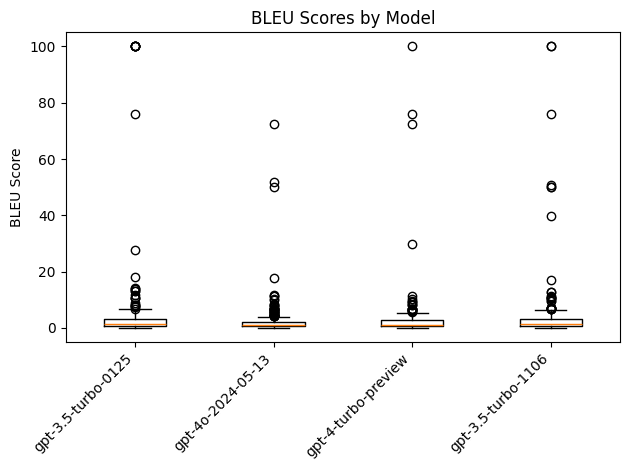

In [20]:
print("\nPairwise Comparisons:")
for i, (model_a_name, model_b_name) in enumerate(model_pairs):
    mean_a = np.mean(model_scores[model_a_name])
    mean_b = np.mean(model_scores[model_b_name])
    difference = mean_a - mean_b
    print(f"Model {model_a_name} vs. Model {model_b_name}:")
    print(f"P-value (Corrected): {pvals_corrected[i]:.4f}")
    print(f"Mean BLEU Difference: {difference:.4f}")
    print(f"Significant (Corrected): {reject[i]}")
    print("-" * 20)

# Visualization
positions = range(len(model_names))
labels = model_names
data = [model_scores[model_name] for model_name in model_names]

plt.boxplot(data, positions=positions, labels=labels)
plt.title("BLEU Scores by Model")
plt.ylabel("BLEU Score")
plt.xticks(positions, labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()